### **Due Date: Friday, April 16, 5PM PDT, on Gradescope.**


# Submission instructions

1. Copy this notebook into your own Google drive with its original name (for example, you can copy this notebook to a folder named `ECE180` that you create in your Google Drive).
2. Work on your own copy and after you are done, make sure all your code has executed and output of the code (if any) is visible below each code block for full credit. You are given skeleton code for Problem 1 and 2 below.
3. To submit to gradescope, download this notebook as a pdf (using `nbconvert` - instructions mentioned below and summarized in point 4, 5 here) after executing all code blocks and rename the pdf to ECE180-S21-HW2-FirstName-LastName-PermNumber.pdf and then submit. **Note**: **When submitting your pdf to gradescope, please indicate the pages where your answers are located.**
4. Note: the default location for Google drive after you mount it (see below for how to mounting) `/content/drive/MyDrive`.
5. Say that the location of this notebook on your google drive is in a folder `ECE180`. Then, the full path for the notebook in Google Colab with its original name would be: `/content/drive/MyDrive/ECE180/ECE180-S21-HW2.ipynb`. Towards the end of this notebook, you will see the command to convert this notebook to pdf, which would be saved as /content/drive/MyDrive/ECE180/ECE180-S21-HW2.pdf. This is the pdf you will rename (point 3) and submit.

# Preliminary steps:
1.   Run code below to mount the Google drive (in some cases, you may need to enter the authorization code for this after following the link that might show). Note: you can view the contents of Google Drive in Google Colab in the left panel after mounting it (you might need to refresh the folders to see). The location for Google Drive after you mount it is `/content/drive/MyDrive`.

In [ ]:
## might need to enter authorization code
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).



2.   Next, let us install the dependencies you will need to convert this notebook to pdf (point 3 of submission instructions) using `nbconvert` utility for submission to Gradescope. To install `nbconvert`, run the following commands - make sure they complete without any errors - seek help on the Gauchospace forums or from TAs if you encounter errors. 
Watch out for a prompt to press ENTER - you have to respond by clicking below the prompt to reveal a text box and then press enter.
NOTE: in order to reduce the size of this notebook, the output of the following code cell can be deleted (by clicking the 'x' icon that shows up in the top left of the cell output, before saving this notebook as a pdf).

In [ ]:
!git clone https://github.com/jupyter/nbconvert.git
%cd nbconvert
!pip install -e .;
%cd /content/
!apt-get -q install pandoc
!apt-get -qq update
!apt-get -qq install inkscape
!add-apt-repository universe
!add-apt-repository ppa:inkscape.dev/stable
!apt-get -qq update
!apt -qq install inkscape
!apt-get -qq install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Cloning into 'nbconvert'...
remote: Enumerating objects: 19638, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 19638 (delta 42), reused 31 (delta 18), pack-reused 19560
Receiving objects: 100% (19638/19638), 4.12 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (13403/13403), done.
/content/nbconvert
Obtaining file:///content/nbconvert
     |████████████████████████████████| 122kB 8.5MB/s 
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
  Running setup.py develop for nbconvert
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5


/content
Reading package lists...
Building dependency tree...
Reading state information...
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
Extracting templates from packages: 100%
Preconfiguring packages ...
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../libperl5.26_5.26.1-6ubuntu0.5_amd64.deb ...
Unpacking libperl5.26:amd64 (5.26.1-6ubuntu0.5) over (5.26.1-6ubuntu0.3) ...
Preparing to unpack .../perl_5.26.1-6ubuntu0.5_amd64.deb ...
Unpacking perl (5.26.1-6ubuntu0.5) over (5.26.1-6ubuntu0.3) ...
Preparing to unpack .../perl-base_5.26.1-6ubuntu0.5_amd64.deb ...
Unpacking perl-base (5.26.1-6ubuntu0.5) over (5.26.1-6ubuntu0.3) ...
Setting up perl-base (5.26.1-6ubuntu0.5) ...
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../perl-modules-5.26_5.26.1-6ubuntu0.5_all.deb ...
Unpacking pe

3. Restart runtime to load newly-installed libraries (Runtine --> Restart runtime)

# Simple Linear vs. Deming Regression

In this programming exercise, we will explore the differences between simple vs. Deming regression.

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression): Accounts for errors in the observations only in the y axis. That is, the residual error is computed using just the y coordinate of given data and the output of the fitted line for the corresponding input x.

[Deming Regression](https://en.wikipedia.org/wiki/Deming_regression): Accounts for errors in the observation on both x and y axis. That is, the residual error is computed using the *perpendicular* distance of the fitted line from the given data points.

For example, see the image is [this link](https://bisque.ece.ucsb.edu/client_service/view?resource=https://bisque.ece.ucsb.edu/data_service/00-zK5MpAScZUqCvjMWk9ijRE). 

For Simple linear regression, the vertical distance of data points (shown in black) from the line is minimized - this distance is shown in blue in the image in link above. The blue line indicates the **vertical residual error**.

For Deming regression, the perpendicular distance of data points (shown in black) from the line is minimized - this distance is shown in red in the image in link above. The red line indicates the **perpendicular residual error**.

For this assignment, you will perform Simple as well as Deming regression to given data and report the performance metrics (vertical and perpendicular residual error) as well as visual results.




First, generate the data for linear regression. We will use this synthetic dataset this assignment. Do not change the seed used to generate the data.

**NOTE**: the experiments for both Simple and Deming regression would be repeated for various number of available data points: 5, 10, 20.

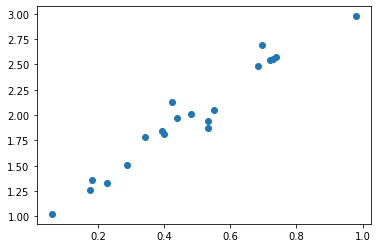

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

maximum_N = 20
sigma = 0.1
np.random.seed(123)

def f(x): return 0.2*np.sin(20*x) +2*x + 1

x_data = np.random.rand(maximum_N)
y_data = f(x_data) + np.random.normal(0,sigma,maximum_N)

plt.scatter(x_data,y_data)

# Problem 1: perform simple linear regression


Next, let's work on a simple linear regression case by using $residual\ error = \frac{1}{n} \sum_{data} (y_{data}-\hat{y})^2$.

1. Given below is some skeleton code.
2. Fill in the SimpleLeastSquares class.
3. Fill in the next cell to fit the `model1_5points` for a given number of data points N (start with N = 5).
4. Predict the output for test input `x_test`.
5. The plotting code is already mentioned - be sure to run it to see the output line overlayed with the input data.
6. Print the formulation for the line that you estimated.
7. Calculate and print the average vertical *and* average perpendicular residual  error of your estimation for the input data points.
8. Repeat steps 3 through 7 for N = 10, 20

Hint: you may use `np.linalg.lstsq`.

In [ ]:
## STUDENT TASK: code up SimpleLeastSquares
class SimpleLeastSquares:
  def fit(self,x,y):
    A = np.vstack([x, np.ones(len(x))]).T
    m,b = np.linalg.lstsq(A, y, rcond=None)[0]
    return m,b

  #def __call__(self,x):
    


Line formulation: y = 2.602235609206688*x+0.732157422560689
Vertical Residual Error:8.763663234428234
Perpendicular Residual Error:0.1688132918386267


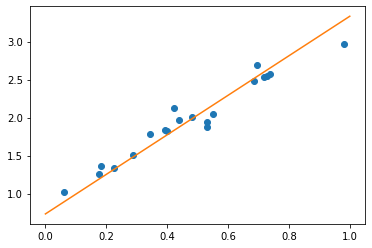

In [ ]:


## SimpleLeastSquares model to 5 data points (N = 5)
N = 5

## initialize the model
model1_5points = SimpleLeastSquares()

## select the given number of points
x_data_selected = x_data[0:N]
y_data_selected = y_data[0:N]

## fit the model for selected points
## STUDENT TASK: ENTER CODE HERE
m,b = model1_5points.fit(x_data_selected, y_data_selected)
## make the prediction for x_test input
x_test = np.linspace(0,1,1000)
y_hat_model1_5points =  m*x_test + b

## plotting code
plt.plot(x_data,y_data,'o')
plt.plot(x_test,y_hat_model1_5points)

## STUDENT TASK: add code to print the formulation of the line
print("Line formulation: y = " +str(m) + "*x+" + str(b))
## STUDENT TASK: add code to compute residual errors (vertical and perpendicular) for input data (x_data, y_data)
res_vert = 1/N*sum((y_data - m*x_data + b)**2)
print("Vertical Residual Error:" + str(res_vert))

res_perp = 1/N * sum(abs(y_data - (m * x_data + b)) / np.sqrt(1 + m**2))
print("Perpendicular Residual Error:" + str(res_perp))

Line formulation: y = 2.200610832548745*x+0.9584129861322119
Vertical Residual Error:7.182006682111241
Perpendicular Residual Error:0.07020653438824741


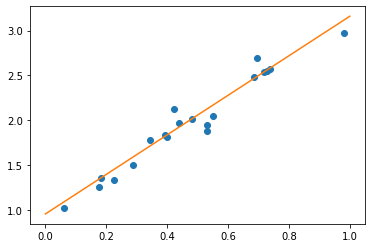

In [ ]:
## STUDENT TASK : repeat the above experiments for N = 10 (skeleton code given)

## SimpleLeastSquares model to 10 data points (N = 10)
N = 10

## initialize the model
model1_10points = SimpleLeastSquares()

## select the given number of points
x_data_selected = x_data[0:N]
y_data_selected = y_data[0:N]

## fit the model for selected points
## STUDENT TASK: ENTER CODE HERE
m,b = model1_10points.fit(x_data_selected, y_data_selected)
## make the prediction for x_test input
x_test = np.linspace(0,1,1000)
y_hat_model1_10points =  m*x_test + b
## plotting code
plt.plot(x_data,y_data,'o')
plt.plot(x_test,y_hat_model1_10points)

## STUDENT TASK: add code to print the formulation of the line
print("Line formulation: y = " +str(m) + "*x+" + str(b))
## STUDENT TASK: add code to compute residual errors (vertical and perpendicular) for input data (x_data, y_data)
res_vert = 1/N*sum((y_data - m*x_data + b)**2)
print("Vertical Residual Error:" + str(res_vert))

res_perp = 1/N * sum(abs(y_data - (m * x_data + b)) / np.sqrt(1 + m**2))
print("Perpendicular Residual Error:" + str(res_perp))

Line formulation: y = 2.2128760929937776*x+0.9273119638694097
Vertical Residual Error:3.4524984700881056
Perpendicular Residual Error:0.034875038249651685


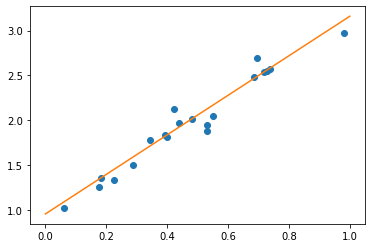

In [ ]:
## STUDENT TASK : repeat the above experiment for N = 20

N = 20 
## STUDENT TASK: enter rest of code as done above and plot the line, print line formulation, print residual errors
## select the given number of points
x_data_selected = x_data[0:N]
y_data_selected = y_data[0:N]

## fit the model for selected points
## STUDENT TASK: ENTER CODE HERE
model1_20points = SimpleLeastSquares()
m,b = model1_20points.fit(x_data_selected, y_data_selected)
## make the prediction for x_test input
x_test = np.linspace(0,1,1000)
y_hat_model1_20points =  m*x_test + b

## plotting code
plt.plot(x_data,y_data,'o')
plt.plot(x_test,y_hat_model1_10points)

## STUDENT TASK: add code to print the formulation of the line
print("Line formulation: y = " +str(m) + "*x+" + str(b))
## STUDENT TASK: add code to compute residual errors (vertical and perpendicular) for input data (x_data, y_data)
res_vert = 1/N*sum((y_data - m*x_data + b)**2)
print("Vertical Residual Error:" + str(res_vert))

res_perp = 1 / N * sum(abs(y_data - (m * x_data + b)) / np.sqrt(1 + m**2))
print("Perpendicular Residual Error:" + str(res_perp))


# Problem 2: perform Deming regression


Next, let's work on a Deming linear regression case by using 

$residual\ error = \frac{1}{n} \sum_{data} \min_{x'} [(m x' + b - y_{data})^2 + (x' - x_{data})^2]$

This minimum, or shortest distnce from the point to the line, will make the residual perpendicular to the best fit line.


1. Given below is some skeleton code.
2. Fill in the DemingLeastSquares class.
3. Fill in the next cell to fit the `model2_5points` for a given number of data points N (start with N = 5).
4. Predict the output for test input `x_test`.
5. The plotting code is already mentioned - be sure to run it to see the output line overlayed with the input data.
6. Print the formulation for the line that you estimated.
7. Calculate and print the average vertical *and* average perpendicular residual  error of your estimation for the input data points.
8. Repeat steps 3 through 7 for N = 10, 20.

Hint: you may use `np.linalg.eig`.


In [ ]:
## STUDENT TASK: code up DemingLeastSquares
class DemingLeastSquares:
  def fit(self,x,y):
    y_bar = np.mean(y)
    x_bar = np.mean(x)
    N = len(y)
    #intercepts
    s_yy = np.sum([(y_i - y_bar)**2 for y_i in y]) / (N-1)
    s_xx = np.sum([(x_i - x_bar)**2 for x_i in x]) / (N-1)
    s_xy = np.sum([(x[i] - x_bar)*(y[i] - y_bar) for i in range(0,N)]) / (N-1)

    self.y_intercept = (s_yy - s_xx) / (2*s_xy)
    self.slope = self.y_intercept + np.sqrt(self.y_intercept**2 + 1)

    return (self.slope, self.y_intercept)

  
  def __call__(self,x):
    return [(self.slope*x_i + self.y_intercept) for x_i in x]


Line formulation: y = 2.66506136300329*x+1.144917740598647
Vertical Residual Error:13.870650073185615
Perpendicular Residual Error:0.609833742092844


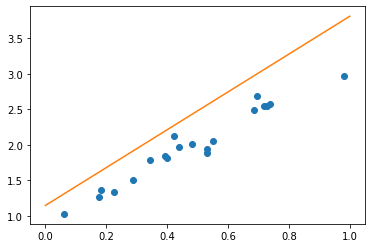

In [ ]:
## STUDENT TASK: fit DemingLeastSquares model to 5 data points i.e., N = 5  (skeleton code given)
N = 5

## initialize the model
model2_5points = DemingLeastSquares()

## select the given number of points
x_data_selected = x_data[0:N]
y_data_selected = y_data[0:N]

## fit the model for selected points
## STUDENT TASK: ENTER CODE HERE
m,b = model2_5points.fit(x_data_selected, y_data_selected)
## make the prediction for x_test input
x_test = np.linspace(0,1,1000)
y_hat_model2_5points = m*x_test + b

## plotting code
plt.plot(x_data,y_data,'o')
plt.plot(x_test,y_hat_model2_5points)

## STUDENT TASK: add code to print the formulation of the line
print("Line formulation: y = " +str(m) + "*x+" + str(b))
## STUDENT TASK: add code to compute residual errors (vertical and perpendicular) for input data (x_data, y_data)
res_vert = 1/N*sum((y_data - m*x_data + b)**2)
print("Vertical Residual Error:" + str(res_vert))

res_perp = 1/N * sum(abs(y_data - (m * x_data + b)) / np.sqrt(1 + m**2))
print("Perpendicular Residual Error:" + str(res_perp))


Line formulation: y = 2.3247048832193093*x+0.9472713775102033
Vertical Residual Error:6.6596521661074535
Perpendicular Residual Error:0.08675390245109786


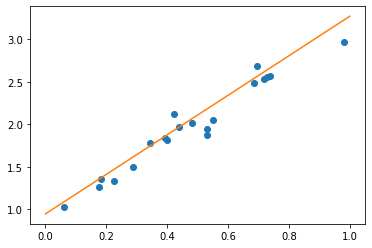

In [ ]:
## STUDENT TASK: fit DemingLeastSquares model to 10 data points i.e., N = 10  (skeleton code given)
N = 10

## initialize the model
model2_10points = DemingLeastSquares()

## select the given number of points
x_data_selected = x_data[0:N]
y_data_selected = y_data[0:N]

## fit the model for selected points
## STUDENT TASK: ENTER CODE HERE
m,b = model2_10points.fit(x_data_selected, y_data_selected)
## make the prediction for x_test input
x_test = np.linspace(0,1,1000)
y_hat_model2_10points = m*x_test + b

## plotting code
plt.plot(x_data,y_data,'o')
plt.plot(x_test,y_hat_model2_10points)

## STUDENT TASK: add code to print the formulation of the line
print("Line formulation: y = " +str(m) + "*x+" + str(b))

## STUDENT TASK: add code to compute residual errors (vertical and perpendicular) for input data (x_data, y_data)
res_vert = 1/N*sum((y_data - m*x_data + b)**2)
print("Vertical Residual Error:" + str(res_vert))

res_perp = 1/N * sum(abs(y_data - (m * x_data + b)) / np.sqrt(1 + m**2))
print("Perpendicular Residual Error:" + str(res_perp))



Line formulation: y = 2.3069691654683093*x+0.936749999765205
Vertical Residual Error:3.3222297632449163
Perpendicular Residual Error:0.039218507998534734


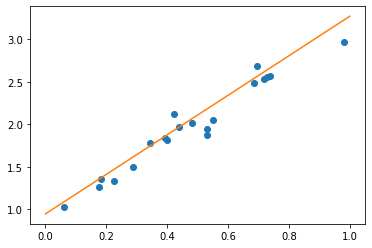

In [ ]:
## STUDENT TASK : repeat the above experiment for N = 20  

N = 20 
## STUDENT TASK: enter rest of code as done above and plot the line, print line formulation, print residual errors

## initialize the model
model2_20points = DemingLeastSquares()

## select the given number of points
x_data_selected = x_data[0:N]
y_data_selected = y_data[0:N]

## fit the model for selected points
## STUDENT TASK: ENTER CODE HERE
m,b = model2_20points.fit(x_data_selected, y_data_selected)
## make the prediction for x_test input
x_test = np.linspace(0,1,1000)
y_hat_model2_20points = m*x_test + b

## plotting code
plt.plot(x_data,y_data,'o')
plt.plot(x_test,y_hat_model2_10points)

## STUDENT TASK: add code to print the formulation of the line
print("Line formulation: y = " +str(m) + "*x+" + str(b))

## STUDENT TASK: add code to compute residual errors (vertical and perpendicular) for input data (x_data, y_data)
res_vert = 1/N*sum((y_data - m*x_data + b)**2)
print("Vertical Residual Error:" + str(res_vert))

res_perp = 1/N * sum(abs(y_data - (m * x_data + b)) / np.sqrt(1 + m**2))
print("Perpendicular Residual Error:" + str(res_perp))

#Report your observations

Comparing the residual errors (both vertical and perpendicular) for Simple least squares and Deming regression, what do you observe? 

Comment about the change magnitude of error for both regression approaches with increasing amount of data and the performance difference of the two regression approaches (Simple vs. Deming) for the same amount of data.
(To enter your response, double click "Your Answer" to activate the text block below.)

# Your Answer:

Comparing the residual errors in the Simple and Deming regression, it can be observed that the vertical residual error has a larger value than the perpendicular residual error. For both models, the values of error decrease as the number of data points increase. This observation can imply that the model becomes more accurate in laying out the line of best fit if there are more data points. An observation from the Deming regression using 5 data points shows that there is insufficient data points to accurately define a line of best fit since the points are far from the line, hence having higher vertical residual error values. 

---
# Save out the notebook
If you saved this notebook into the folder `ECE180` in google drive with original name, then run the following command (otherwise, adjust the path to the notebook and its name according to how you saved it). The saved out PDF will show up in the same directory as your copy of this notebook. Rename the pdf as mentioned in submission instructions and submit it to gradescope.

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/ECE180/ECE180-S21-HW2.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ECE180/ECE180-S21-HW2.ipynb to PDF
/content/nbconvert/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Support files will be in ECE180-S21-HW2_files/
[NbConvertApp] Making directory ./ECE180-S21-HW2_files
[NbConvertApp] Making directory ./ECE180-S21-HW2_files
[NbConvertApp] Making directory ./ECE180-S21-HW2_files
[NbConvertApp] Making directory ./ECE180-S21-HW2_files
[NbConvertApp] Making directory ./ECE180-S21-HW2_files
[NbConvertApp] Making directory ./ECE180-S21-HW2_files
[NbConvertApp] Making directory ./ECE180-S21-HW2_files
[NbConvertApp] Writing 110050 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b